# Student Alcohol Consumption

## Overview
It is well understood that binge drinking has a negative effect on the adolescent brain. Effects include [damaged brain tissue](https://www.npr.org/templates/story/story.php?storyId=122765890), which impacts thinking and memory, as well as decreased function in the liver and [heart](http://www.heart.org/en/healthy-living/healthy-eating/eat-smart/nutrition-basics/alcohol-and-heart-health). With all of these risks, it is important to protect teenagers and young adults by addressing the underlying causes of drinking. However, the challenge becomes detecting those that are at risk for dangerous drinking behaviors so that personalized assistance can be given.


### Our Data Set
We have 30 features about students at two secondary schools in Portugal in math and Portuguese classes. These features include workday alcohol and weekend alcohol consumption, but also other variables related to the student's life such as grades, mother's/father's job, family size, etc.

### Our Challenge
We wish to detect students that are at risk of engaging in dangerous drinking behavior so that we can get them the assistance they need. At risk for dangerous drinking behavior is defined as fitting into the 4 or 5 category (high or very-high consumption) for workday or weekend alcohol consumption. The major challenges here revolve around deciding which measure of alcohol consumption to try to predict and which variables to use to predict it.

In [26]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Preparing the Data

### Checking for Missing Values

In [14]:
math_class = pd.read_csv('./data/student-mat.csv')
portuguese_class = pd.read_csv('./data/student-por.csv')

pd.isnull(math_class).any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [15]:
pd.isnull(portuguese_class).any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

At the moment, it does not look like we have any values in the data that are null/missing. This makes us think that the data set has another way of representing that data that is missing (than leaving it blank), which will be investigated further in exploratory data analysis.

### Combining the Data Sets
Since both data sets include data from students in both schools and both schools are in Portugal, we believe it is appropriate to combine the two data sets.

In [17]:
math_class['class'] = 'math'
portuguese_class['class'] = 'portuguese'

combined_data = pd.concat([math_class, portuguese_class])

# Changing categorical variables from string to categorical
combined_data.loc[:, combined_data.dtypes == object] = combined_data.loc[:, combined_data.dtypes == object].astype('category')

### Adding New Variables

Having drinking split up into workday and weekend drinking does not make much sense since we are trying to predict drinking level overall. As such, we will average these two columns into an overall_drinking feature. Furthermore, it has been proven that [poorer people are more negatively affected by alcohol](https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667(17)30078-6/fulltext?elsca1=tlxpr), both in risk for dangerous drinking behaviors and effects of excessive drinking. While not a perfect measure, [poverty is strongly correlated with low education level](https://poverty.ucdavis.edu/faq/how-does-level-education-relate-poverty) and so we will define our new feature, poor, as 1 when both parents have an education level of <= 2 (9th grade or less) and 0 otherwise.

In [54]:
# Averaging workday and weekend drinking
combined_data['overall_drinking'] = ((combined_data['Walc'] + combined_data['Dalc']) / 2).astype('int')

# Adding our new feature
combined_data['poor'] = np.where((combined_data['Fedu'] <= 2) & (combined_data['Medu'] <= 2), 1, 0)

## Exploratory Data Analysis

### Drinking Distribution
As a first look, we decided to look at the distribution of drinking in the data set.

C:\Users\james\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Count of Occurrences')

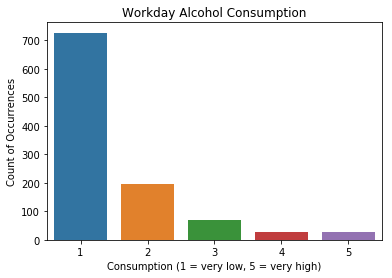

In [55]:
fig, ax = plt.subplots()
fig = sns.countplot(x="Dalc", data=combined_data)
ax.set_title('Workday Alcohol Consumption')
ax.set_xlabel('Consumption (1 = very low, 5 = very high)')
ax.set_ylabel('Count of Occurrences')

C:\Users\james\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Count of Occurrences')

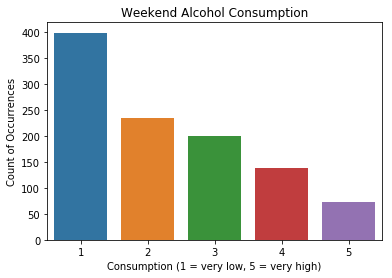

In [56]:
fig, ax = plt.subplots()
fig = sns.countplot(x="Walc", data=combined_data)
ax.set_title('Weekend Alcohol Consumption')
ax.set_xlabel('Consumption (1 = very low, 5 = very high)')
ax.set_ylabel('Count of Occurrences')

C:\Users\james\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Count of Occurrences')

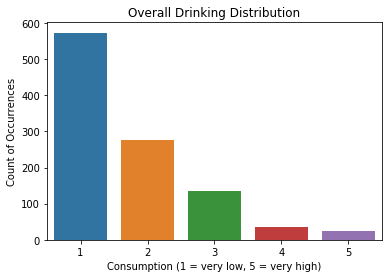

In [57]:
fig, ax = plt.subplots()
fig = sns.countplot(x="overall_drinking", data=combined_data)
ax.set_title('Overall Drinking Distribution')
ax.set_xlabel('Consumption (1 = very low, 5 = very high)')
ax.set_ylabel('Count of Occurrences')

As expected, drinking levels are very low on workdays and pick up on the weekends. Overall drinking follows a relatively similar distribution to workday alcohol consumption which means that for most people, drinking does not change a huge amount from workday to weekend.

### Age Distribution

C:\Users\james\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0,0.5,'Count of Occurrences')

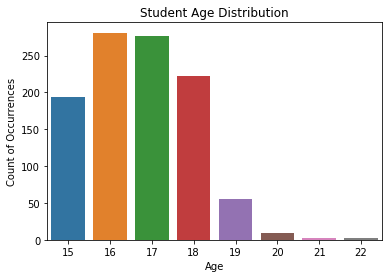

In [60]:
fig, ax = plt.subplots()
fig = sns.countplot(x="age", data=combined_data)
ax.set_title('Student Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Occurrences')

Both schools are secondary schools (the equivalent of American high schools) so it makes sense that most students are between 15 and 18. There are a few notable outliers here, with students as old as 21-22.

### Correlations
Since we want to predict drinking level from the features in the data set, it is only natural to look at the correlations between the features. 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text xticklabel objects>)

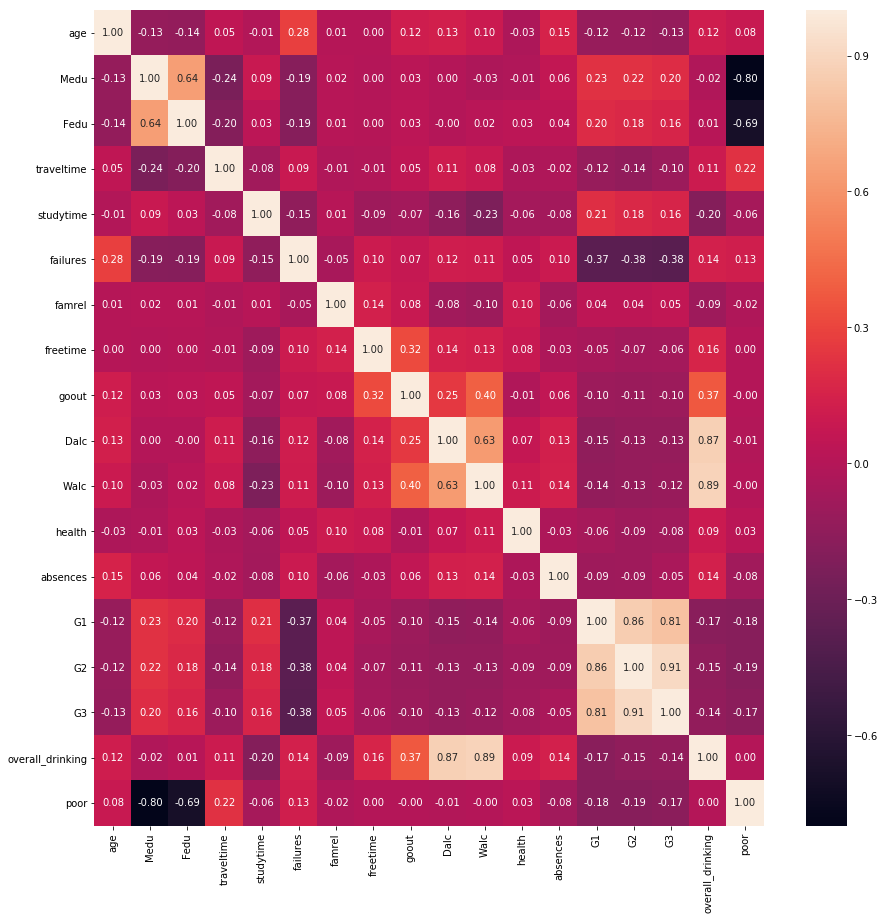

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(combined_data.corr(),annot = True,fmt = ".2f")
plt.xticks(rotation=90)

Looking at our variable of interest (overall_drinking), there are a a few variables that stick out: 

- Age: As of July 1, 2015, the [drinking age in Portugal was 18](https://www.publico.pt/2015/06/30/sociedade/noticia/1-de-julho-nova-legislacao-sobre-o-alcool-e-a-vacina-prevenar-em-vigor-1700632). However, this data set was collected in 2008 and the drinking age at the time was 16. As such, it makes sense that drinking and age are correlated.
- Travel Time: This feature describes how long a student takes to travel to school. A longer travel time could indicate that the student comes from a rural area as opposed to the urban area where the schools are located, and living in a rural area could be correlated with higher drinking but that needs more investigation.
- Study Time: 
- Failures:
- Go Out:
- Absences:
- G1, G2, G3: